In [1]:
#import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#load data
df = pd.read_csv (r'C:\Users\Tombra\Water-potability-prediction-\water_potability.csv')

In [3]:
# Calculate the column averages
column_averages = df.min()

# Replace null values with column averages
df1 = df.fillna(column_averages)

In [4]:
#feature engineering

# Create interaction terms between features
df1['Interaction'] = df1['Chloramines'] * df1['Sulfate']
df1['Salinity'] = df1['ph'] * df1['Conductivity']

In [5]:
df1.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Temperature (°C),Interaction,Salinity
count,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000,3776.000000
mean,6.172650,199.570569,19141.588565,7.289110,264.306028,415.367834,12.684736,54.885226,3.993615,0.470869,22.057256,1904.749121,2559.929061
std,2.749539,31.872029,10990.028046,1.563979,102.642271,80.370889,5.126099,28.969081,0.744270,0.499217,0.901069,834.351098,1275.054369
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000,20.300000,68.415317,0.000000
25%,5.601838,180.396784,12856.878673,6.285221,129.000000,350.771045,10.725899,44.569406,3.509629,0.000000,21.200000,1083.920865,2158.093008
50%,7.010000,202.271110,19404.727865,7.357187,306.798574,404.610116,13.634994,62.449306,4.000000,0.000000,22.200000,1978.964718,2618.613010
75%,7.696378,221.000000,26299.535837,8.313145,344.342565,472.697639,16.137654,74.674085,4.500000,1.000000,22.900000,2511.761117,3340.729802
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000,23.600000,5294.555296,7084.210304


In [6]:
df1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Temperature (°C),Interaction,Salinity
0,7.342400,204.890456,20791.318980,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,23.1,2690.248100,4143.379863
1,3.716080,129.422921,18630.057860,6.635246,129.000000,592.885359,15.180013,56.329076,4.500656,0,22.3,855.946719,2203.209470
2,8.099124,224.236259,19909.541730,9.275884,129.000000,418.606213,16.868637,66.420093,3.055934,0,21.5,1196.588985,3390.343706
3,8.316766,214.373394,22018.417440,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0,22.9,2876.263988,3021.202569
4,9.092223,181.101509,17978.986340,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,20.7,2030.334611,3622.440143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,7.010000,208.000000,320.942611,7.100000,129.000000,327.000000,2.200000,0.738000,4.600000,1,20.5,915.900000,2292.270000
3772,7.310000,225.000000,320.942611,9.400000,129.000000,361.000000,2.200000,0.738000,3.800000,1,21.3,1212.600000,2638.910000
3773,7.020000,212.000000,320.942611,7.500000,129.000000,334.000000,2.200000,0.738000,4.700000,1,22.6,967.500000,2344.680000
3774,7.250000,230.000000,320.942611,8.700000,129.000000,359.000000,2.200000,0.738000,3.900000,1,21.2,1122.300000,2602.750000


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale all columns in the DataFrame
df1_scaled= pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

In [8]:
df1_scaled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Temperature (°C),Interaction,Salinity
0,0.524457,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0,0.848485,0.501677,0.584875
1,0.265434,0.297400,0.300611,0.491839,0.000000,0.719411,0.497319,0.450999,0.576793,0.0,0.606061,0.150691,0.311003
2,0.578509,0.641311,0.321619,0.698543,0.000000,0.414652,0.562017,0.532866,0.303637,0.0,0.363636,0.215871,0.478578
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0,0.787879,0.537270,0.426470
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0,0.121212,0.375405,0.511340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,0.500714,0.582418,0.000000,0.528219,0.000000,0.254462,0.000000,0.000000,0.595576,1.0,0.060606,0.162163,0.323575
3772,0.522143,0.644081,0.000000,0.708258,0.000000,0.313917,0.000000,0.000000,0.444318,1.0,0.303030,0.218935,0.372506
3773,0.501429,0.596927,0.000000,0.559530,0.000000,0.266703,0.000000,0.000000,0.614483,1.0,0.696970,0.172036,0.330973
3774,0.517857,0.662217,0.000000,0.653464,0.000000,0.310420,0.000000,0.000000,0.463226,1.0,0.272727,0.201656,0.367402


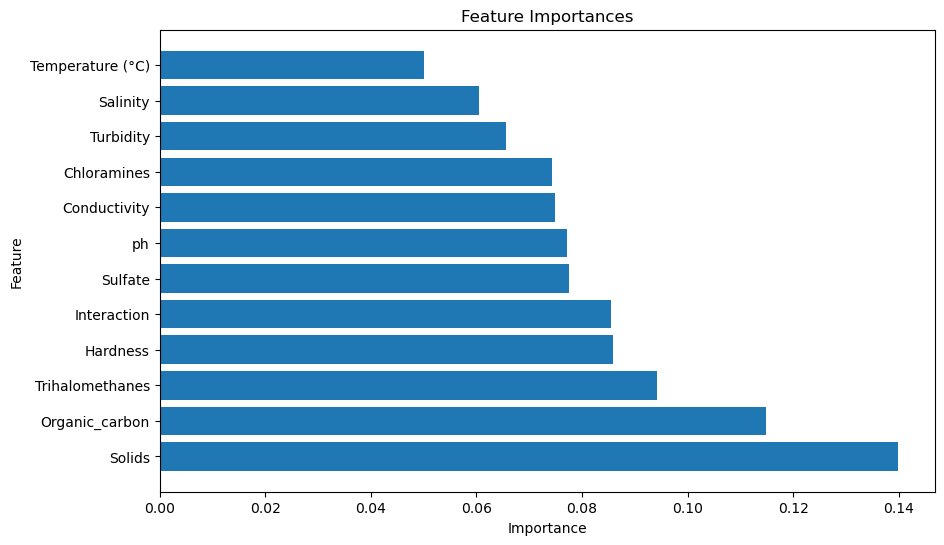

In [9]:
#determining feature importance

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Split the data into features (X) and target (y)
X = df1.drop("Potability", axis=1)  # Exclude the target column
y = df1["Potability"]

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame to hold feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()



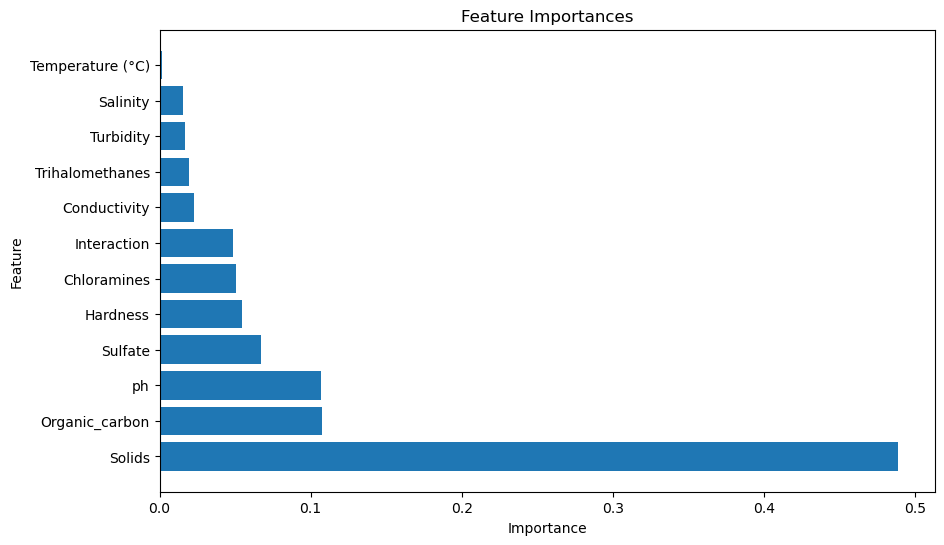

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into features (X) and target (y)
X = df1.drop("Potability", axis=1)  # Exclude the target column
y = df1["Potability"]

# Train a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X, y)

# Get feature importances
importances = gb_classifier.feature_importances_

# Create a DataFrame to hold feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


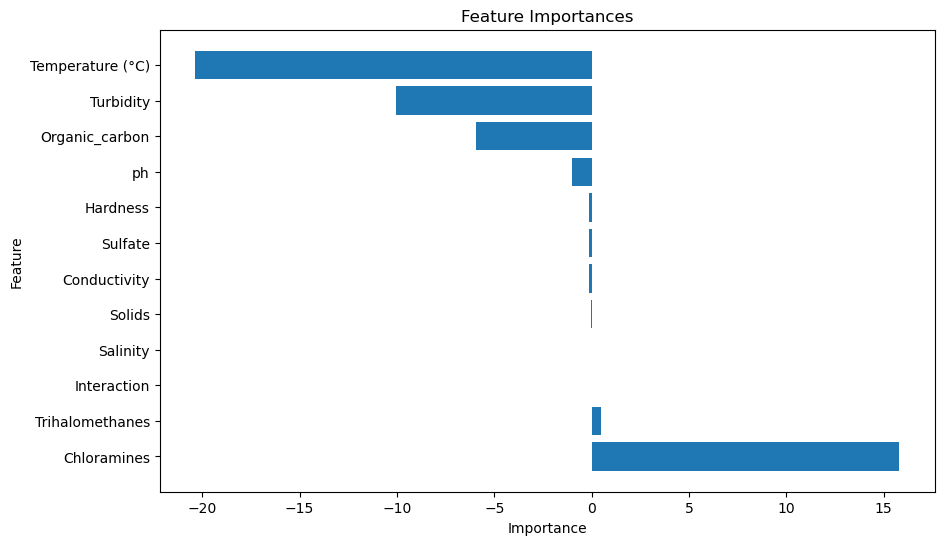

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Split the data into features (X) and target (y)
X = df1.drop("Potability", axis=1)  # Exclude the target column
y = df1["Potability"]

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X, y)

# Get feature importances
importances = svm_classifier.coef_[0]

# Create a DataFrame to hold feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


Trying different classifiers to identify the best. The Random Forest classifier gave the best accuracy at predicting potability

In [12]:
#using the scaled dataframe
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Split the data into features (X) and target (y)
X = df1_scaled.drop("Potability", axis=1)  # Exclude the target column
y = df1_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB()
]

# Train and evaluate each classifier
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classifier.__class__.__name__, "Accuracy:", accuracy)


LogisticRegression Accuracy: 0.6256613756613757
DecisionTreeClassifier Accuracy: 0.6402116402116402
RandomForestClassifier Accuracy: 0.7275132275132276
SVC Accuracy: 0.6865079365079365
KNeighborsClassifier Accuracy: 0.656084656084656
GaussianNB Accuracy: 0.6243386243386243


In [14]:
#trying logistic regression
# Split the data into features (X) and target (y)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df1_scaled[['Organic_carbon']]  # Select the organic_carbon column as the feature
y = df1_scaled['Potability']  # Assuming you have a 'Potability' column indicating water potability

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.623015873015873
Precision: 0.65625
Recall: 0.4602739726027397
F1-Score: 0.5410628019323672
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.77      0.68       391
         1.0       0.66      0.46      0.54       365

    accuracy                           0.62       756
   macro avg       0.63      0.62      0.61       756
weighted avg       0.63      0.62      0.61       756

Accuracy: 0.623015873015873


In [16]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
X = df1.drop("Potability", axis=1)  # Exclude the target column
y = df1["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform feature selection
k_best = SelectKBest(score_func=f_classif, k=5)
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

# Initialize the gradient descent classifier
model = SGDClassifier(loss='log', max_iter=1000)

# Fit the model to the training data
model.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_selected)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.5965608465608465
Precision: 0.6339285714285714
Recall: 0.38904109589041097
F1-Score: 0.4821731748726656
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.79      0.67       391
           1       0.63      0.39      0.48       365

    accuracy                           0.60       756
   macro avg       0.61      0.59      0.58       756
weighted avg       0.61      0.60      0.58       756

Accuracy: 0.5965608465608465


c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df1.drop("Potability", axis=1)  # Exclude the target column
y = df1["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.6865079365079365
Precision: 0.8018867924528302
Recall: 0.4657534246575342
F1-Score: 0.5892547660311959
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.89      0.75       391
           1       0.80      0.47      0.59       365

    accuracy                           0.69       756
   macro avg       0.72      0.68      0.67       756
weighted avg       0.72      0.69      0.67       756

Accuracy: 0.6865079365079365


In [18]:
#using scaled df
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df1_scaled.drop("Potability", axis=1)  # Exclude the target column
y = df1_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6904761904761905
Precision: 0.8046511627906977
Recall: 0.473972602739726
F1-Score: 0.596551724137931
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.89      0.75       391
         1.0       0.80      0.47      0.60       365

    accuracy                           0.69       756
   macro avg       0.72      0.68      0.67       756
weighted avg       0.72      0.69      0.68       756

Accuracy: 0.6904761904761905


In [19]:
#looking for the best classifier

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df1_scaled.drop("Potability", axis=1)  # Exclude the target column
y = df1_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the individual classifiers
logistic_regression = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)

# Initialize the Voting Classifier with the individual classifiers
model = VotingClassifier(estimators=[('lr', logistic_regression), ('dt', decision_tree), ('svm', svm)])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.6825396825396826
Precision: 0.8881987577639752
Recall: 0.3917808219178082
F1-Score: 0.5437262357414449
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.95      0.76       391
         1.0       0.89      0.39      0.54       365

    accuracy                           0.68       756
   macro avg       0.76      0.67      0.65       756
weighted avg       0.75      0.68      0.65       756

Accuracy: 0.6825396825396826


Trying an ensemble model to see if it is better than the random forest classifier

In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df1_scaled.drop("Potability", axis=1)  # Exclude the target column
y = df1_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the individual classifiers
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
knn = KNeighborsClassifier()

# Initialize the Voting Classifier with the individual classifiers
model = VotingClassifier(estimators=[('rf', random_forest), ('gb', gradient_boosting), ('knn', knn)])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.6891534391534392
Precision: 0.8385416666666666
Recall: 0.4410958904109589
F1-Score: 0.578096947935368
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.92      0.75       391
         1.0       0.84      0.44      0.58       365

    accuracy                           0.69       756
   macro avg       0.74      0.68      0.67       756
weighted avg       0.73      0.69      0.67       756

Accuracy: 0.6891534391534392


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df1.drop("Potability", axis=1)  # Exclude the target column
y = df1["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Initialize and train Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)
gb_predictions = gradient_boosting.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Initialize and train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)


Random Forest Accuracy: 0.6865079365079365
Gradient Boosting Accuracy: 0.6812169312169312
K-Nearest Neighbors Accuracy: 0.6058201058201058


In [363]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df1_scaled.drop("Potability", axis=1)  # Exclude the target column
y = df1_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Initialize and train Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)
gb_predictions = gradient_boosting.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Initialize and train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

# Initialize and train Support Vector Classifier
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
print("Support Vector Classifier Accuracy:", svc_accuracy)

# Initialize and train Logistic Regression Classifier
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)
lr_predictions = logistic_regression.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

# Initialize and train Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
dt_predictions = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)


Random Forest Accuracy: 0.6904761904761905
Gradient Boosting Accuracy: 0.6798941798941799
K-Nearest Neighbors Accuracy: 0.656084656084656
Support Vector Classifier Accuracy: 0.6865079365079365
Logistic Regression Accuracy: 0.6256613756613757
Decision Tree Accuracy: 0.6574074074074074


In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = df1_scaled.drop("Potability", axis=1)  # Exclude the target column
y = df1_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature selection with Random Forest
selector = SelectFromModel(RandomForestClassifier())
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_selected)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.66005291005291
Precision: 0.7523364485981309
Recall: 0.4410958904109589
F1-Score: 0.5561312607944733
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.86      0.72       391
         1.0       0.75      0.44      0.56       365

    accuracy                           0.66       756
   macro avg       0.69      0.65      0.64       756
weighted avg       0.69      0.66      0.64       756

Accuracy: 0.66005291005291


In [22]:
df1_scaled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Temperature (°C),Interaction,Salinity
0,0.524457,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0,0.848485,0.501677,0.584875
1,0.265434,0.297400,0.300611,0.491839,0.000000,0.719411,0.497319,0.450999,0.576793,0.0,0.606061,0.150691,0.311003
2,0.578509,0.641311,0.321619,0.698543,0.000000,0.414652,0.562017,0.532866,0.303637,0.0,0.363636,0.215871,0.478578
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0,0.787879,0.537270,0.426470
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0,0.121212,0.375405,0.511340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,0.500714,0.582418,0.000000,0.528219,0.000000,0.254462,0.000000,0.000000,0.595576,1.0,0.060606,0.162163,0.323575
3772,0.522143,0.644081,0.000000,0.708258,0.000000,0.313917,0.000000,0.000000,0.444318,1.0,0.303030,0.218935,0.372506
3773,0.501429,0.596927,0.000000,0.559530,0.000000,0.266703,0.000000,0.000000,0.614483,1.0,0.696970,0.172036,0.330973
3774,0.517857,0.662217,0.000000,0.653464,0.000000,0.310420,0.000000,0.000000,0.463226,1.0,0.272727,0.201656,0.367402


In [443]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Apply scaling and or normalization to numeric features
# Perform feature engineering on the dataset

def feature_engineering(df1):
    df1['Scaled_Hardness'] = (df1['Hardness'] - df1['Hardness'].mean()) / df1['Hardness'].std()
    df1 ['Scaled_Salinity'] = (df1 ['Salinity'] - df1 ['Salinity'].min ()) / (df1['Salinity'].max () - df1['Salinity'].min())
    df1 ['Scaled_Interaction'] = (df1 ['Interaction'] - df1 ['Interaction'].min ()) / (df1['Interaction'].max () - df1['Interaction'].min())
    df1 ['Scaled_Sulfate'] = (df1 ['Sulfate'] - df1 ['Sulfate'].min ()) / (df1['Sulfate'].max () - df1['Sulfate'].min())
    df1 ['Scaled_Conductivity'] = (df1 ['Conductivity'] - df1 ['Conductivity'].min ()) / (df1['Conductivity'].max () - df1['Conductivity'].min())
    df1['Scaled_Solids'] = (df1['Solids'] - df1['Solids'].min()) / (df1['Solids'].max() - df1['Solids'].min())
    
    
    
    return df1

# Split the data into features (X) and target (y)
X = df1_scaled.drop("Potability", axis=1)  # Exclude the target column
y = df1_scaled["Potability"]

# Perform feature engineering on the dataset
X = feature_engineering(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.7142857142857143


In [23]:
df1_scaled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Temperature (°C),Interaction,Salinity
0,0.524457,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0,0.848485,0.501677,0.584875
1,0.265434,0.297400,0.300611,0.491839,0.000000,0.719411,0.497319,0.450999,0.576793,0.0,0.606061,0.150691,0.311003
2,0.578509,0.641311,0.321619,0.698543,0.000000,0.414652,0.562017,0.532866,0.303637,0.0,0.363636,0.215871,0.478578
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0,0.787879,0.537270,0.426470
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0,0.121212,0.375405,0.511340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,0.500714,0.582418,0.000000,0.528219,0.000000,0.254462,0.000000,0.000000,0.595576,1.0,0.060606,0.162163,0.323575
3772,0.522143,0.644081,0.000000,0.708258,0.000000,0.313917,0.000000,0.000000,0.444318,1.0,0.303030,0.218935,0.372506
3773,0.501429,0.596927,0.000000,0.559530,0.000000,0.266703,0.000000,0.000000,0.614483,1.0,0.696970,0.172036,0.330973
3774,0.517857,0.662217,0.000000,0.653464,0.000000,0.310420,0.000000,0.000000,0.463226,1.0,0.272727,0.201656,0.367402


In [24]:
df1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Temperature (°C),Interaction,Salinity
0,7.342400,204.890456,20791.318980,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,23.1,2690.248100,4143.379863
1,3.716080,129.422921,18630.057860,6.635246,129.000000,592.885359,15.180013,56.329076,4.500656,0,22.3,855.946719,2203.209470
2,8.099124,224.236259,19909.541730,9.275884,129.000000,418.606213,16.868637,66.420093,3.055934,0,21.5,1196.588985,3390.343706
3,8.316766,214.373394,22018.417440,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0,22.9,2876.263988,3021.202569
4,9.092223,181.101509,17978.986340,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,20.7,2030.334611,3622.440143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,7.010000,208.000000,320.942611,7.100000,129.000000,327.000000,2.200000,0.738000,4.600000,1,20.5,915.900000,2292.270000
3772,7.310000,225.000000,320.942611,9.400000,129.000000,361.000000,2.200000,0.738000,3.800000,1,21.3,1212.600000,2638.910000
3773,7.020000,212.000000,320.942611,7.500000,129.000000,334.000000,2.200000,0.738000,4.700000,1,22.6,967.500000,2344.680000
3774,7.250000,230.000000,320.942611,8.700000,129.000000,359.000000,2.200000,0.738000,3.900000,1,21.2,1122.300000,2602.750000


In [25]:
df2 = df1.copy()


In [26]:
df2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Temperature (°C),Interaction,Salinity
0,7.342400,204.890456,20791.318980,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,23.1,2690.248100,4143.379863
1,3.716080,129.422921,18630.057860,6.635246,129.000000,592.885359,15.180013,56.329076,4.500656,0,22.3,855.946719,2203.209470
2,8.099124,224.236259,19909.541730,9.275884,129.000000,418.606213,16.868637,66.420093,3.055934,0,21.5,1196.588985,3390.343706
3,8.316766,214.373394,22018.417440,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0,22.9,2876.263988,3021.202569
4,9.092223,181.101509,17978.986340,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,20.7,2030.334611,3622.440143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,7.010000,208.000000,320.942611,7.100000,129.000000,327.000000,2.200000,0.738000,4.600000,1,20.5,915.900000,2292.270000
3772,7.310000,225.000000,320.942611,9.400000,129.000000,361.000000,2.200000,0.738000,3.800000,1,21.3,1212.600000,2638.910000
3773,7.020000,212.000000,320.942611,7.500000,129.000000,334.000000,2.200000,0.738000,4.700000,1,22.6,967.500000,2344.680000
3774,7.250000,230.000000,320.942611,8.700000,129.000000,359.000000,2.200000,0.738000,3.900000,1,21.2,1122.300000,2602.750000


In [27]:
#more feature engineering to improve accuracy
df2['Scaled_Hardness'] = (df2['Hardness'] - df2['Hardness'].min()) / (df2['Hardness'].max() - df2['Hardness'].mean())
df2['Scaled_Salinity'] = (df2['Salinity'] - df2['Salinity'].min()) / (df2['Salinity'].max() - df2['Salinity'].mean())
df2['Scaled_Interaction'] = (df2['Interaction'] - df2['Interaction'].min()) / (df2['Interaction'].max() - df2['Interaction'].mean())
df2['Scaled_Sulfate'] = (df2['Sulfate'] - df2['Sulfate'].min()) / (df2['Sulfate'].max() - df2['Sulfate'].mean())
df2['Scaled_Conductivity'] = (df2['Conductivity'] - df2['Conductivity'].min()) / (df2['Conductivity'].max() - df2['Conductivity'].mean())
df2['Scaled_Solids'] = (df2['Solids'] - df2['Solids'].min()) / (df2['Solids'].max() - df2['Solids'].mean())



In [28]:
df2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Temperature (°C),Interaction,Salinity,Scaled_Hardness,Scaled_Salinity,Scaled_Interaction,Scaled_Sulfate,Scaled_Conductivity,Scaled_Solids
0,7.342400,204.890456,20791.318980,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,23.1,2690.248100,4143.379863,1.274416,0.915810,0.773446,1.105165,1.132703,0.486399
1,3.716080,129.422921,18630.057860,6.635246,129.000000,592.885359,15.180013,56.329076,4.500656,0,22.3,855.946719,2203.209470,0.663607,0.486974,0.232323,0.000000,1.217255,0.435045
2,8.099124,224.236259,19909.541730,9.275884,129.000000,418.606213,16.868637,66.420093,3.055934,0,21.5,1196.588985,3390.343706,1.430994,0.749366,0.332814,0.000000,0.701598,0.465447
3,8.316766,214.373394,22018.417440,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0,22.9,2876.263988,3021.202569,1.351168,0.667775,0.828321,1.051501,0.537859,0.515556
4,9.092223,181.101509,17978.986340,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,20.7,2030.334611,3622.440143,1.081876,0.800666,0.578770,0.835788,0.641844,0.419574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,7.010000,208.000000,320.942611,7.100000,129.000000,327.000000,2.200000,0.738000,4.600000,1,20.5,915.900000,2292.270000,1.299583,0.506659,0.250010,0.000000,0.430554,0.000000
3772,7.310000,225.000000,320.942611,9.400000,129.000000,361.000000,2.200000,0.738000,3.800000,1,21.3,1212.600000,2638.910000,1.437176,0.583277,0.337537,0.000000,0.531153,0.000000
3773,7.020000,212.000000,320.942611,7.500000,129.000000,334.000000,2.200000,0.738000,4.700000,1,22.6,967.500000,2344.680000,1.331958,0.518244,0.265232,0.000000,0.451265,0.000000
3774,7.250000,230.000000,320.942611,8.700000,129.000000,359.000000,2.200000,0.738000,3.900000,1,21.2,1122.300000,2602.750000,1.477644,0.575285,0.310898,0.000000,0.525235,0.000000


In [29]:
from sklearn.preprocessing import StandardScaler

# Select the features to be scaled
features_to_scale = ['Hardness', 'Salinity', 'Interaction', 'Sulfate', 'Conductivity', 'Solids']

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the selected features
df2_scaled = df2.copy()  # Create a copy of the DataFrame
df2_scaled[features_to_scale] = scaler.fit_transform(df2[features_to_scale])

# View the updated DataFrame with scaled features
df2_scaled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Temperature (°C),Interaction,Salinity,Scaled_Hardness,Scaled_Salinity,Scaled_Interaction,Scaled_Sulfate,Scaled_Conductivity,Scaled_Solids
0,7.342400,0.166936,0.150131,7.300212,1.015412,1.853414,10.379783,86.990970,2.963135,0,23.1,0.941574,1.242034,1.274416,0.915810,0.773446,1.105165,1.132703,0.486399
1,3.716080,-2.201207,-0.046551,6.635246,-1.318404,2.209022,15.180013,56.329076,4.500656,0,22.3,-1.257194,-0.279805,0.663607,0.486974,0.232323,0.000000,1.217255,0.435045
2,8.099124,0.774000,0.069887,9.275884,-1.318404,0.040298,16.868637,66.420093,3.055934,0,21.5,-0.848868,0.651364,1.430994,0.749366,0.332814,0.000000,0.701598,0.465447
3,8.316766,0.464507,0.261802,8.059332,0.902088,-0.648347,18.436525,100.341674,4.628771,0,22.9,1.164550,0.361816,1.351168,0.667775,0.828321,1.051501,0.537859,0.515556
4,9.092223,-0.579552,-0.105801,6.546600,0.446559,-0.211013,11.558279,31.997993,4.075075,0,20.7,0.150539,0.833417,1.081876,0.800666,0.578770,0.835788,0.641844,0.419574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,7.010000,0.264512,-1.712747,7.100000,-1.318404,-1.099646,2.200000,0.738000,4.600000,1,20.5,-1.185328,-0.209948,1.299583,0.506659,0.250010,0.000000,0.430554,0.000000
3772,7.310000,0.797966,-1.712747,9.400000,-1.318404,-0.676551,2.200000,0.738000,3.800000,1,21.3,-0.829676,0.061951,1.437176,0.583277,0.337537,0.000000,0.531153,0.000000
3773,7.020000,0.390031,-1.712747,7.500000,-1.318404,-1.012538,2.200000,0.738000,4.700000,1,22.6,-1.123476,-0.168838,1.331958,0.518244,0.265232,0.000000,0.451265,0.000000
3774,7.250000,0.954864,-1.712747,8.700000,-1.318404,-0.701439,2.200000,0.738000,3.900000,1,21.2,-0.937918,0.033588,1.477644,0.575285,0.310898,0.000000,0.525235,0.000000


In [30]:
from sklearn.preprocessing import MinMaxScaler

# Select the features to be scaled
features_to_scale = ['Hardness', 'Salinity', 'Interaction', 'Sulfate', 'Conductivity', 'Solids']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the selected features
df2_scaled = df2.copy()  # Create a copy of the DataFrame
df2_scaled[features_to_scale] = scaler.fit_transform(df2[features_to_scale])

# View the updated DataFrame with scaled features
df2_scaled


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Temperature (°C),Interaction,Salinity,Scaled_Hardness,Scaled_Salinity,Scaled_Interaction,Scaled_Sulfate,Scaled_Conductivity,Scaled_Solids
0,7.342400,0.571139,0.336096,7.300212,0.680385,0.669439,10.379783,86.990970,2.963135,0,23.1,0.501677,0.584875,1.274416,0.915810,0.773446,1.105165,1.132703,0.486399
1,3.716080,0.297400,0.300611,6.635246,0.000000,0.719411,15.180013,56.329076,4.500656,0,22.3,0.150691,0.311003,0.663607,0.486974,0.232323,0.000000,1.217255,0.435045
2,8.099124,0.641311,0.321619,9.275884,0.000000,0.414652,16.868637,66.420093,3.055934,0,21.5,0.215871,0.478578,1.430994,0.749366,0.332814,0.000000,0.701598,0.465447
3,8.316766,0.605536,0.356244,8.059332,0.647347,0.317880,18.436525,100.341674,4.628771,0,22.9,0.537270,0.426470,1.351168,0.667775,0.828321,1.051501,0.537859,0.515556
4,9.092223,0.484851,0.289922,6.546600,0.514545,0.379337,11.558279,31.997993,4.075075,0,20.7,0.375405,0.511340,1.081876,0.800666,0.578770,0.835788,0.641844,0.419574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,7.010000,0.582418,0.000000,7.100000,0.000000,0.254462,2.200000,0.738000,4.600000,1,20.5,0.162163,0.323575,1.299583,0.506659,0.250010,0.000000,0.430554,0.000000
3772,7.310000,0.644081,0.000000,9.400000,0.000000,0.313917,2.200000,0.738000,3.800000,1,21.3,0.218935,0.372506,1.437176,0.583277,0.337537,0.000000,0.531153,0.000000
3773,7.020000,0.596927,0.000000,7.500000,0.000000,0.266703,2.200000,0.738000,4.700000,1,22.6,0.172036,0.330973,1.331958,0.518244,0.265232,0.000000,0.451265,0.000000
3774,7.250000,0.662217,0.000000,8.700000,0.000000,0.310420,2.200000,0.738000,3.900000,1,21.2,0.201656,0.367402,1.477644,0.575285,0.310898,0.000000,0.525235,0.000000


In [31]:
#using the newly engineered features in df2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Split the data into features (X) and target (y)
X = df2_scaled.drop("Potability", axis=1)  # Exclude the target column
y = df2_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.7103174603174603
Precision: 0.811965811965812
Recall: 0.5205479452054794
F1-Score: 0.6343906510851418
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       391
           1       0.81      0.52      0.63       365

    accuracy                           0.71       756
   macro avg       0.74      0.70      0.70       756
weighted avg       0.74      0.71      0.70       756

Accuracy: 0.7103174603174603


c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


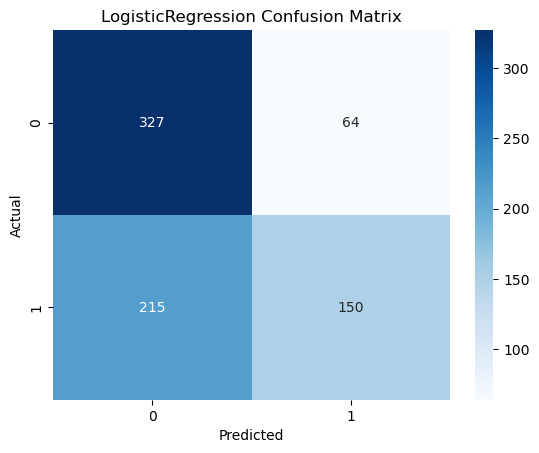

LogisticRegression Accuracy: 0.6309523809523809


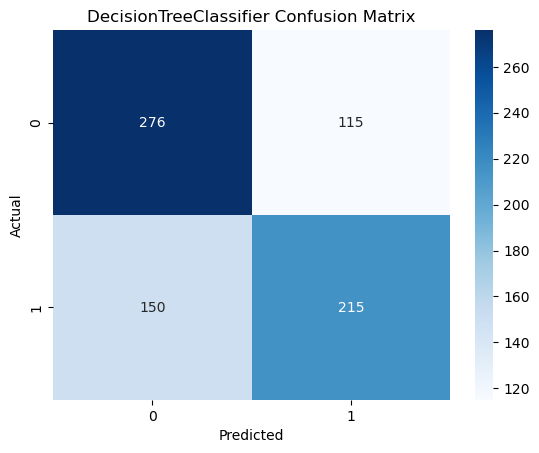

DecisionTreeClassifier Accuracy: 0.6494708994708994


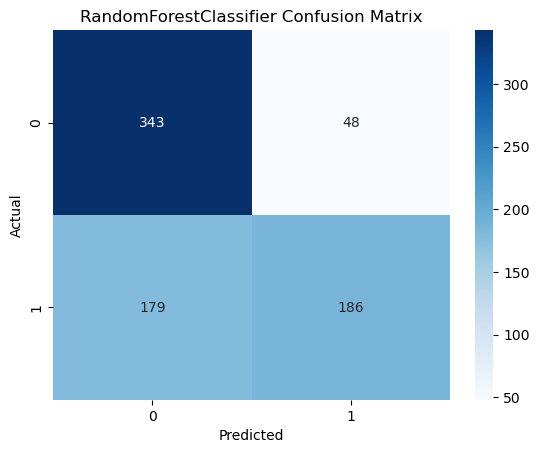

RandomForestClassifier Accuracy: 0.6997354497354498


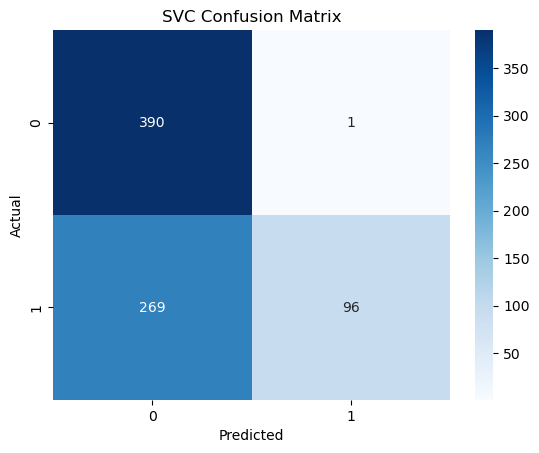

SVC Accuracy: 0.6428571428571429


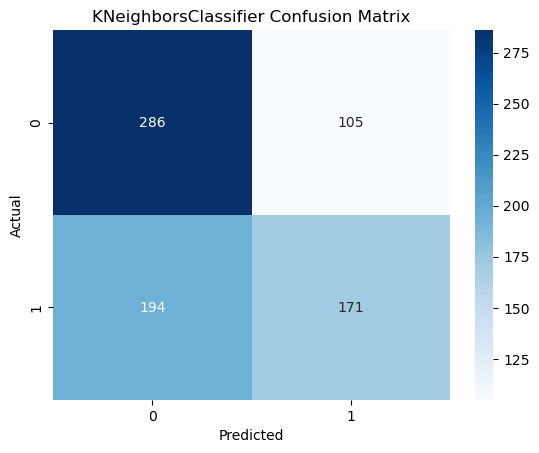

KNeighborsClassifier Accuracy: 0.6044973544973545


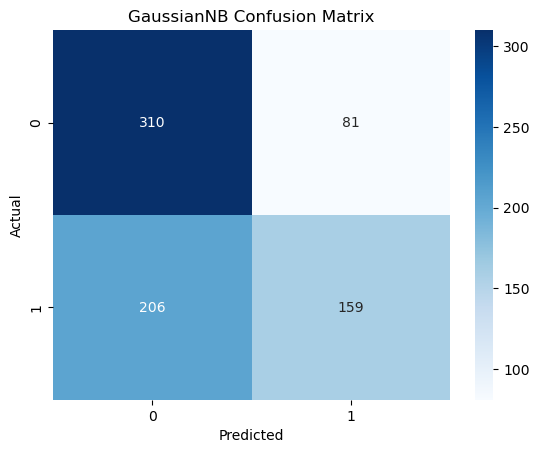

GaussianNB Accuracy: 0.6203703703703703


In [515]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into features (X) and target (y)
X = df2_scaled.drop("Potability", axis=1)  # Exclude the target column
y = df2_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB()
]

# Train and evaluate each classifier
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure()
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(classifier.__class__.__name__ + " Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    print(classifier.__class__.__name__, "Accuracy:", accuracy)


In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = df2_scaled.drop("Potability", axis=1)  # Exclude the target column
y = df2_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection with Random Forest
selector = SelectFromModel(RandomForestClassifier(n_estimators=500))  # Increase the number of trees
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train a Random Forest classifier with tuned hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=2)  # Adjust hyperparameters
rf_classifier.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_selected)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.6626984126984127
Precision: 0.9044117647058824
Recall: 0.336986301369863
F1-Score: 0.4910179640718563
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.97      0.75       391
           1       0.90      0.34      0.49       365

    accuracy                           0.66       756
   macro avg       0.76      0.65      0.62       756
weighted avg       0.75      0.66      0.62       756

Accuracy: 0.6626984126984127


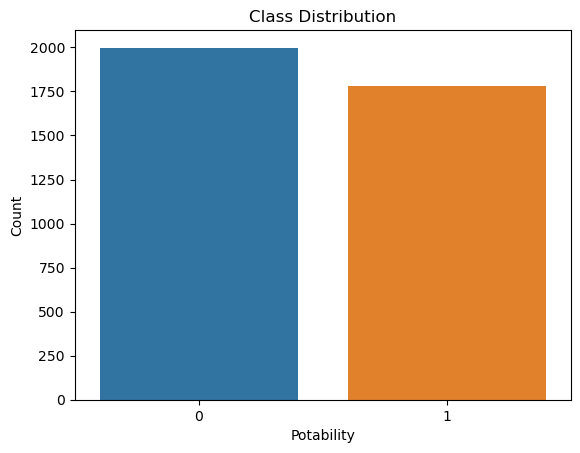

In [517]:
# to check if theres a data imbalance

import seaborn as sns

# Count the occurrences of each class in the target variable
class_counts = df2_scaled['Potability'].value_counts()

# Create a bar plot
sns.countplot(x='Potability', data=df2_scaled)

# Set the labels and title
plt.xlabel('Potability')
plt.ylabel('Count')
plt.title('Class Distribution')

# Display the plot
plt.show()


In [33]:
#use SMOTE to address data imbalance using the dataframe with only 13 features

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df1_scaled.drop("Potability", axis=1)  # Exclude the target column
y = df1_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now you can use the resampled data for training your model
# For example, using RandomForestClassifier:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.708994708994709
Precision: 0.7821011673151751
Recall: 0.5506849315068493
F1-Score: 0.6463022508038585
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.86      0.75       391
         1.0       0.78      0.55      0.65       365

    accuracy                           0.71       756
   macro avg       0.73      0.70      0.70       756
weighted avg       0.72      0.71      0.70       756

Accuracy: 0.708994708994709


In [244]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = df1.drop("Potability", axis=1)
y = df1["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [245]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt']  # Number of features to consider when looking for the best split
}

In [246]:
# Initialize the RandomForestClassifier model
rf_classifier = RandomForestClassifier()

In [247]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [248]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [249]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.7156084656084656


In [518]:
#using the scaled dataframe
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = df2_scaled.drop("Potability", axis=1)  # Exclude the target column
y = df2_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Initialize the classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB()
]

# Train and evaluate each classifier
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classifier.__class__.__name__, "Accuracy:", accuracy)

c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.6468253968253969
DecisionTreeClassifier Accuracy: 0.6243386243386243
RandomForestClassifier Accuracy: 0.7156084656084656
SVC Accuracy: 0.6706349206349206
KNeighborsClassifier Accuracy: 0.6296296296296297
GaussianNB Accuracy: 0.6388888888888888


In [35]:
#using smote to balance the data in the data frame with 19 features

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df2_scaled.drop("Potability", axis=1)  # Exclude the target column
y = df2_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

# Apply SMOTE to the training data
smote = SMOTE(random_state=55)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now you can use the resampled data for training your model
# For example, using RandomForestClassifier:
rf_classifier = RandomForestClassifier(random_state=55)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.7248677248677249
Precision: 0.7782101167315175
Recall: 0.5698005698005698
F1-Score: 0.6578947368421053
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       405
           1       0.78      0.57      0.66       351

    accuracy                           0.72       756
   macro avg       0.74      0.71      0.71       756
weighted avg       0.73      0.72      0.72       756

Accuracy: 0.7248677248677249


In [527]:
#saving the model

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import joblib

# Split the data into features (X) and target (y)
X = df2_scaled.drop("Potability", axis=1)  # Exclude the target column
y = df2_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

# Apply SMOTE to the training data
smote = SMOTE(random_state=55)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model using resampled data
rf_classifier = RandomForestClassifier(random_state=55)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the trained model to a file
model_filename = r'C:\Users\Tombra\Water-potability-prediction-/trained_model.pkl'
joblib.dump(rf_classifier, model_filename)
print("Trained model saved to:", model_filename)


Accuracy: 0.7248677248677249
Trained model saved to: C:\Users\Tombra\Water-potability-prediction-/trained_model.pkl


In [528]:
df2_scaled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Temperature (°C),Interaction,Salinity,Scaled_Hardness,Scaled_Salinity,Scaled_Interaction,Scaled_Sulfate,Scaled_Conductivity,Scaled_Solids
0,7.342400,0.571139,0.336096,7.300212,0.680385,0.669439,10.379783,86.990970,2.963135,0,23.1,0.501677,0.584875,1.274416,0.915810,0.773446,1.105165,1.132703,0.486399
1,3.716080,0.297400,0.300611,6.635246,0.000000,0.719411,15.180013,56.329076,4.500656,0,22.3,0.150691,0.311003,0.663607,0.486974,0.232323,0.000000,1.217255,0.435045
2,8.099124,0.641311,0.321619,9.275884,0.000000,0.414652,16.868637,66.420093,3.055934,0,21.5,0.215871,0.478578,1.430994,0.749366,0.332814,0.000000,0.701598,0.465447
3,8.316766,0.605536,0.356244,8.059332,0.647347,0.317880,18.436525,100.341674,4.628771,0,22.9,0.537270,0.426470,1.351168,0.667775,0.828321,1.051501,0.537859,0.515556
4,9.092223,0.484851,0.289922,6.546600,0.514545,0.379337,11.558279,31.997993,4.075075,0,20.7,0.375405,0.511340,1.081876,0.800666,0.578770,0.835788,0.641844,0.419574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,7.010000,0.582418,0.000000,7.100000,0.000000,0.254462,2.200000,0.738000,4.600000,1,20.5,0.162163,0.323575,1.299583,0.506659,0.250010,0.000000,0.430554,0.000000
3772,7.310000,0.644081,0.000000,9.400000,0.000000,0.313917,2.200000,0.738000,3.800000,1,21.3,0.218935,0.372506,1.437176,0.583277,0.337537,0.000000,0.531153,0.000000
3773,7.020000,0.596927,0.000000,7.500000,0.000000,0.266703,2.200000,0.738000,4.700000,1,22.6,0.172036,0.330973,1.331958,0.518244,0.265232,0.000000,0.451265,0.000000
3774,7.250000,0.662217,0.000000,8.700000,0.000000,0.310420,2.200000,0.738000,3.900000,1,21.2,0.201656,0.367402,1.477644,0.575285,0.310898,0.000000,0.525235,0.000000


In [250]:
#trying to improve model using grid search

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = df1_scaled.drop("Potability", axis=1)
y = df1_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [251]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt']  # Number of features to consider when looking for the best split
}

In [252]:
# Initialize the RandomForestClassifier model
rf_classifier = RandomForestClassifier()

In [253]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [254]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [255]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 0.7129629629629629


In [529]:
#testing the initial model with 13 features

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

test_data = pd.read_csv(r'C:\Users\Tombra\WATER\test_file.csv', encoding='latin-1')



# Perform feature engineering on the test data
test_data['Interaction'] = test_data['Chloramines'] * test_data['Sulfate']
test_data['Salinity'] = test_data['ph'] * test_data['Conductivity']
df= test_data

df['Scaled_Hardness'] = (df['Hardness'] - df['Hardness'].min()) / (df['Hardness'].max() - df['Hardness'].mean())
df['Scaled_Salinity'] = (df['Salinity'] - df['Salinity'].min()) / (df['Salinity'].max() - df['Salinity'].mean())
df['Scaled_Interaction'] = (df['Interaction'] - df['Interaction'].min()) / (df['Interaction'].max() - df['Interaction'].mean())
df['Scaled_Sulfate'] = (df['Sulfate'] - df['Sulfate'].min()) / (df['Sulfate'].max() - df['Sulfate'].mean())
df['Scaled_Conductivity'] = (df['Conductivity'] - df['Conductivity'].min()) / (df['Conductivity'].max() - df['Conductivity'].mean())
df['Scaled_Solids'] = (df['Solids'] - df['Solids'].min()) / (df['Solids'].max() - df['Solids'].mean())




from sklearn.preprocessing import StandardScaler

# Select the features to be scaled
features_to_scale = ['Hardness', 'Salinity', 'Interaction', 'Sulfate', 'Conductivity', 'Solids']

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the selected features
df_scaled = df.copy()  # Create a copy of the DataFrame
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])



# Make predictions using the best_model
predictions = best_model.predict(df_scaled)

print (predictions)


[1. 0.]


It predicted that the first borehole had potable water while the second didnt. 

In [258]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = df2_scaled.drop("Potability", axis=1)
y = df2_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [259]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt']  # Number of features to consider when looking for the best split
}

In [260]:
# Initialize the RandomForestClassifier model
rf_classifier = RandomForestClassifier()

In [261]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [262]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [263]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.7195767195767195


In [269]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = df2_scaled.drop("Potability", axis=1)
y = df2_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt']  # Number of features to consider when looking for the best split
}
# Initialize the RandomForestClassifier model
rf_classifier = RandomForestClassifier()

In [270]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [271]:

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.7261904761904762


In [273]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = df2_scaled.drop("Potability", axis=1)
y = df2_scaled["Potability"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [200, 300, 400],  # Number of trees in the forest
    'max_depth': [None, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt']  # Number of features to consider when looking for the best split
}
# Initialize the RandomForestClassifier model
rf_classifier = RandomForestClassifier()

In [274]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 400]})

In [276]:

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400}
Accuracy: 0.7248677248677249


In [530]:
#Testing the model by predicting potability of 2 boreholes using model created with 19 features

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import joblib

# Load the new dataset without the potability column
test_data = pd.read_csv(r'C:\Users\Tombra\WATER\test_file.csv', encoding='latin-1')

# Perform feature engineering on the test data
test_data['Interaction'] = test_data['Chloramines'] * test_data['Sulfate']
test_data['Salinity'] = test_data['ph'] * test_data['Conductivity']
df= test_data

df['Scaled_Hardness'] = (df['Hardness'] - df['Hardness'].min()) / (df['Hardness'].max() - df['Hardness'].mean())
df['Scaled_Salinity'] = (df['Salinity'] - df['Salinity'].min()) / (df['Salinity'].max() - df['Salinity'].mean())
df['Scaled_Interaction'] = (df['Interaction'] - df['Interaction'].min()) / (df['Interaction'].max() - df['Interaction'].mean())
df['Scaled_Sulfate'] = (df['Sulfate'] - df['Sulfate'].min()) / (df['Sulfate'].max() - df['Sulfate'].mean())
df['Scaled_Conductivity'] = (df['Conductivity'] - df['Conductivity'].min()) / (df['Conductivity'].max() - df['Conductivity'].mean())
df['Scaled_Solids'] = (df['Solids'] - df['Solids'].min()) / (df['Solids'].max() - df['Solids'].mean())


from sklearn.preprocessing import StandardScaler

# Select the features to be scaled
features_to_scale = ['Hardness', 'Salinity', 'Interaction', 'Sulfate', 'Conductivity', 'Solids']

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the selected features
df_scaled = df.copy()  # Create a copy of the DataFrame
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Load the trained model
model = joblib.load(r'C:\Users\Tombra\Water-potability-prediction-\trained_model.pkl')  # Replace with the actual path to your trained model

# Make predictions on the new data
predictions = model.predict(df_scaled)

# Add the predicted potability values to the new dataset
df['Potability'] = predictions

# Print the predicted potability for each sample
prediction_labels = {1: "Potable", 0: "Not Potable"}
for prediction in predictions:
    print(prediction_labels[prediction])


Potable
Not Potable


It predicted that the first borehole had potable water and the second borhole did not have potable water

In [531]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Temperature (°C),Interaction,Salinity,Scaled_Hardness,Scaled_Salinity,Scaled_Interaction,Scaled_Sulfate,Scaled_Conductivity,Scaled_Solids,Potability
0,7.5,95,693,493,609,1004,5.87,674,242,23.7,300237,7530.0,2.0,2.0,2.0,0.0,2.0,0.0,1
1,6.9,39,2019,435,645,964,6.93,923,211,21.8,280575,6651.6,0.0,0.0,0.0,2.0,0.0,2.0,0
